# Training


In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import gc
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.callbacks as cb 
import h5py
import datetime

In [3]:
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import sklearn.metrics
import scipy.special

In [4]:
rand_gen = np.random.RandomState(41)

HEIGHT = 137
WIDTH = 236

VALIDATION_SPLIT = 98
TEST_SPLIT = 99

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

To deal with dataset we need to have train/val/test datasets in hdf5 files
use cases:

1. local/colab testing and architecture tuning - train on train, then validate on val and measure final score on test
2. while training final model for submittion - mixup all 3 
3. while ensembling - use val as train for ensemble and test to verify score


4. would be nice to keep class distibution across the datasets, but this can be done later

hdf format is 2 datasets, 1st with pictures, 2nd with labels (same shape across 1 axis)
split size for train could be the same as original files, excluding test


In [ ]:
# train_files = [str.format('Data/bengaliai-cv19/train_image_data_{0}.parquet',i) for i in range(4) ]


# train_df = pd.read_csv('Data/bengaliai-cv19/train.csv')
# y_labels = train_df.image_id.copy()
# y_1 = pd.get_dummies(train_df.vowel_diacritic).values
# y_2 = pd.get_dummies(train_df.grapheme_root).values
# y_3 = pd.get_dummies(train_df.consonant_diacritic).values
# y = np.hstack([y_1,y_2,y_3])
# assert(y.shape[1]==11+168+7)
# del train_df, y_1,y_2,y_3
# gc.collect()
# assert (y_labels.shape[0]==y.shape[0])
# n_samples = y.shape[0]

at this point we know the whole DS contains y.shape[0] = y_labels.shape[0] examples and we can split those accordingly

In [ ]:
# shuffled_indexes = rand_gen.permutation(y.shape[0])
# train_indexes = shuffled_indexes[:n_samples*VALIDATION_SPLIT//100]
# valid_indexes = shuffled_indexes[n_samples*VALIDATION_SPLIT//100:n_samples*TEST_SPLIT//100]
# test_indexes  = shuffled_indexes[n_samples*TEST_SPLIT//100:]

# valid_images = []
# valid_labels = []
# test_images = []
# test_labels = []

In [ ]:
# for i in range(4):
#     chunk_train_indexes = np.compress((train_indexes>=i*50210) & (train_indexes<(i+1)*50210),train_indexes)
#     chunk_valid_indexes = np.compress((valid_indexes>=i*50210) & (valid_indexes<(i+1)*50210),valid_indexes)
#     chunk_test_indexes = np.compress((test_indexes>=i*50210) & (test_indexes<(i+1)*50210),test_indexes)

#     print('loading '+train_files[i])
#     images = pd.read_parquet(train_files[i])
#     # we'd better use numpy indexing instead of combining numpy and pandas (not sure they are 100% consistent)
#     # float 16 is enough to save from parquet to hdf5
#     all_chunk_images = images.iloc[:,1:].values.astype(np.float16).reshape(-1, HEIGHT, WIDTH)/255.0
#     del images
#     gc.collect()

#     # saving train, split by 2 files each
    
#     train_chunk_images = all_chunk_images[chunk_train_indexes-50210*i] # train
#     train_y_chuck = y[chunk_train_indexes]
#     assert(train_y_chuck.shape[0]==train_chunk_images.shape[0])
    
#     train_split_idx = train_y_chuck.shape[0]//2

#     ## Not dry, but can live with it, as it's one time thing
#     train_chunk_0_fname = str.format('Data/bengaliai-cv19/train_image_data_processed{0}.hdf5',2*i)
#     h5f = h5py.File(train_chunk_0_fname, 'w')
#     h5f.create_dataset('images', data = train_chunk_images[:train_split_idx])
#     h5f.create_dataset('labels', data = train_y_chuck[:train_split_idx])
#     h5f.close()
#     print('saved '+train_chunk_0_fname)

#     train_chunk_1_fname = str.format('Data/bengaliai-cv19/train_image_data_processed{0}.hdf5',2*i+1)
#     h5f = h5py.File(train_chunk_1_fname, 'w')
#     h5f.create_dataset('images', data = train_chunk_images[train_split_idx:])
#     h5f.create_dataset('labels', data = train_y_chuck[train_split_idx:])
#     h5f.close()
#     print('saved '+train_chunk_1_fname)


#     ## for reading - 
#     # In [10]: h5f = h5py.File('data.h5','r')
#     # In [11]: b = h5f['dataset_1'][:]
#     # In [12]: h5f.close()

#     chunk_valid_images = all_chunk_images[chunk_valid_indexes-50210*i] # valid
#     chunk_valid_labels = y[chunk_valid_indexes]
#     assert(chunk_valid_labels.shape[0]==chunk_valid_images.shape[0])
#     valid_images.append(chunk_valid_images)
#     valid_labels.append(chunk_valid_labels)

#     chunk_test_images = all_chunk_images[chunk_test_indexes-50210*i] # test
#     chunk_test_labels = y[chunk_test_indexes]
#     assert(chunk_test_labels.shape[0]==chunk_test_images.shape[0])
#     test_images.append(chunk_test_images)
#     test_labels.append(chunk_test_labels)

#     del train_chunk_images, train_y_chuck
#     gc.collect()
#     print('completed '+train_files[i])

In [ ]:
# saving valid and test 

# valid_images_all = np.vstack(valid_images)
# valid_labels_all = np.vstack(valid_labels)
# test_images_all = np.vstack(test_images)
# test_labels_all = np.vstack(test_labels)

# ## Not dry, but can live with it, as it's one time thing
# h5f = h5py.File('Data/bengaliai-cv19/valid_image_data_processed.hdf5', 'w')
# h5f.create_dataset('images', data = valid_images_all)
# h5f.create_dataset('labels', data = valid_labels_all)
# h5f.close()

# h5f = h5py.File('Data/bengaliai-cv19/test_image_data_processed.hdf5', 'w')
# h5f.create_dataset('images', data = test_images_all)
# h5f.create_dataset('labels', data = test_labels_all)
# h5f.close()

# del valid_images,valid_labels,test_images,test_labels
# del valid_images_all,valid_labels_all,test_images_all,test_labels_all
# gc.collect()

In [5]:
def images_generator(batch_size, shuffle=True, scale_range = [0.8,0.9,1.0,1.1,1.2], rotate_range=[-10,0,10]):    
    files = [str.format('Data/bengaliai-cv19/train_image_data_processed{0}.hdf5',i) for i in range(8) ]
    current_file_idx = 0
    already_send = 0     
    steps = 0
    center = ( HEIGHT / 2, WIDTH/ 2)
    
    while True:
        h5f = h5py.File(files[current_file_idx],'r')
        train_X = (h5f['images'][:]).astype('float32')
        train_Y = h5f['labels'][:]
        h5f.close()        
        
        while (already_send<train_X.shape[0]):
            if (already_send+batch_size<train_X.shape[0]):
                train_batch_X = train_X[already_send:already_send+batch_size,:]
                train_batch_Y = train_Y[already_send:already_send+batch_size,:]
            else:
                train_batch_X = train_X[already_send:,:]
                train_batch_Y = train_Y[already_send:,:]
            assert (train_batch_X.shape[0]==train_batch_Y.shape[0])
            
            train_batch_X_aug = np.array(train_batch_X,dtype='float32')
            
            for b in range(train_batch_X.shape[0]):
                scale = np.random.choice(scale_range)
                angle = np.random.choice(rotate_range)
                M=cv2.getRotationMatrix2D(center, angle, scale)                
                train_batch_X_aug[b]=cv2.warpAffine(train_batch_X[b], M, (WIDTH,HEIGHT),  borderValue=1.0)            
            
            assert (train_batch_X_aug.shape[0]==train_batch_Y.shape[0])
            steps+=1            
            yield np.expand_dims(train_batch_X_aug,axis=3), train_batch_Y
            already_send+=batch_size
        already_send=0
        current_file_idx+=1
        if (current_file_idx==8):
            current_file_idx = 0

In [ ]:
# # test generator
# cnt = 0
# batch_size = 5
# f, ax = plt.subplots(5, 5, figsize=(16, 8))
# ax = ax.flatten()

# for i in images_generator(1):
#     ax[cnt].imshow(np.squeeze((i[0][0]*255).astype(int)) , cmap='Greys')
#     cnt+=1
#     if cnt>=25:
#         break;
    

In [6]:
valid_file_name = 'Data/bengaliai-cv19/valid_image_data_processed.hdf5'
h5f = h5py.File(valid_file_name,'r')
valid_X = np.expand_dims(h5f['images'][:],axis=3)
valid_Y = h5f['labels'][:]
h5f.close()

In [ ]:
def build_model():
    '''
    Constructs the ML model used to predict handwritten digits.
    Taken from https://github.com/tensorflow/models/blob/master/official/vision/image_classification/mnist_main.py
    '''
    image = tf.keras.layers.Input(shape=(137, 236, 1))
    y = tf.keras.layers.Conv2D(filters=32,
                             kernel_size=5,
                             padding='same',
                             activation='relu')(image)

    y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                   strides=(2, 2),
                                   padding='same')(y)
    
    y = tf.keras.layers.Conv2D(filters=32,
                             kernel_size=5,
                             padding='same',
                             activation='relu')(y)
    
    y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                   strides=(2, 2),
                                   padding='same')(y)
    y = tf.keras.layers.Flatten()(y)
    y = tf.keras.layers.Dense(1024, activation='relu')(y)
    y = tf.keras.layers.Dropout(0.4)(y)
    
    out_0 = tf.keras.layers.Dense(11, activation='softmax')(y)
    out_1 = tf.keras.layers.Dense(168, activation='softmax')(y)
    out_2 = tf.keras.layers.Dense(7, activation='softmax')(y)
    
    out_m=tf.concat(values=[out_0,out_1,out_2],axis=1)
        
    model = tf.keras.models.Model(image, out_m, name='bengali')

    return model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
def build_inception_model():
    
    img_input = keras.layers.Input(shape=(HEIGHT,WIDTH,1))
    inception_model_def = InceptionV3(include_top=False, input_tensor=img_input,weights=None)
    #Adding custom Layers 
    y = inception_model_def.output
    y = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(y)
    y = tf.keras.layers.Dense(1024, activation='softmax', name='predictions')(y)
    y = tf.keras.layers.Dropout(0.4)(y)
    
    out_0 = tf.keras.layers.Dense(11, activation='softmax')(y)
    out_1 = tf.keras.layers.Dense(168, activation='softmax')(y)
    out_2 = tf.keras.layers.Dense(7, activation='softmax')(y)
    
    out_m=tf.concat(values=[out_0,out_1,out_2],axis=1)

    inception_model = tf.keras.models.Model(img_input, out_m, name='inception_bengali')
    
    return inception_model

In [ ]:
# inception_model = build_inception_model()
# # compile the model 
# inception_model.compile(
#                     optimizer = keras.optimizers.Adam(),
# #     optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
#                     loss = tf.keras.losses.binary_crossentropy,
#                     metrics=['binary_accuracy',tf.keras.metrics.Recall(name='recall')])

In [ ]:
# # Callbacks reused from 
# # https://www.kaggle.com/deshwalmahesh/bengali-ai-complete-beginner-tutorial-95-acc

# model_fname_inception = 'models/inception_model-' + datetime.datetime.now().strftime('%Y-%m-%d-%H-%M')
# # then go to callback definitions and run 

# R_LR_P = cb.ReduceLROnPlateau(monitor='val_recall',patience=3,verbose=1,factor=0.5,min_lr=0.00001,mode='max')
# # if validation loss of out_1 is not decreasing for 3 consecutive epochs, decrease the learning rate by 0.5 
# # given if learning rate is above 0.00001 and give us little insight on what has happened verbose=1

# ES = cb.EarlyStopping(monitor='val_recall',patience=4, min_delta=0.0025,mode='max')
# # stop the model from fitting data if validation loss has not decreased by 0.0025 in the last 5 epochs

# MCP = cb.ModelCheckpoint(model_fname_inception+'.hdf5', monitor ='val_recall', verbose =1, 
#                       save_best_only = True, save_weights_only=True,mode='max')
# # save the weights in a file name specified only if the validation loss of out_1 layer has improved from 
# # last save. out_1 because it's recall matters twice 

# callbacks = [R_LR_P,ES,MCP]

In [ ]:
# history = inception_model.fit(
#       images_generator(batch_size=64),
#       epochs=30,
#       steps_per_epoch=3080,
#       validation_data = (valid_X, valid_Y),
#       callbacks=callbacks
# )

In [7]:
# from tensorflow.keras.applications.vgg16 import VGG16

def build_vgg16_model():    
    img_input = keras.layers.Input(shape=(HEIGHT,WIDTH,1))
    
#     vgg16_model_def = VGG16(include_top=False, input_tensor=img_input,weights=None)
    #Adding custom Layers 
#     y = vgg16_model_def.output
    # Block 1
    x = keras.layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv1')(img_input)
    x = keras.layers.Conv2D(64, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block1_conv2')(x)
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = keras.layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1')(x)
    x = keras.layers.Conv2D(128, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block2_conv2')(x)
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = keras.layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1')(x)
    x = keras.layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2')(x)
    x = keras.layers.Conv2D(256, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3')(x)
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1')(x)
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2')(x)
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3')(x)
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1')(x)
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2')(x)
    x = keras.layers.Conv2D(512, (3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3')(x)
    x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    
    # x->y
    y = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    
    y = tf.keras.layers.Dense(4096, activation='softmax', name='predictions')(y)
#     y = tf.keras.layers.Dropout(0.4)(y)
    
    out_0 = tf.keras.layers.Dense(11, activation='softmax')(y)
    out_1 = tf.keras.layers.Dense(168, activation='softmax')(y)
    out_2 = tf.keras.layers.Dense(7, activation='softmax')(y)
    
    out_m=tf.concat(values=[out_0,out_1,out_2],axis=1)

    vgg16_model = tf.keras.models.Model(img_input, out_m, name='vgg16_bengali')
    
    return vgg16_model

In [8]:
vgg16_model = build_vgg16_model()
# compile the model 
vgg16_model.compile(
                    optimizer = keras.optimizers.Adam(),
#     optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
#                     loss = tf.keras.losses.binary_crossentropy,
                    loss = tf.keras.losses.categorical_crossentropy,
                    metrics=['binary_accuracy',tf.keras.metrics.Recall(name='recall')])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# Callbacks reused from 
# https://www.kaggle.com/deshwalmahesh/bengali-ai-complete-beginner-tutorial-95-acc

model_fname_vgg16 = 'models/vgg16_model-' + datetime.datetime.now().strftime('%Y-%m-%d-%H-%M')
# then go to callback definitions and run 

R_LR_P = cb.ReduceLROnPlateau(monitor='val_recall',patience=3,verbose=1,factor=0.5,min_lr=0.00001,mode='max')
# if validation loss of out_1 is not decreasing for 3 consecutive epochs, decrease the learning rate by 0.5 
# given if learning rate is above 0.00001 and give us little insight on what has happened verbose=1

ES = cb.EarlyStopping(monitor='val_recall',patience=4, min_delta=0.0025,mode='max')
# stop the model from fitting data if validation loss has not decreased by 0.0025 in the last 5 epochs

MCP = cb.ModelCheckpoint(model_fname_vgg16+'.hdf5', monitor ='val_recall', verbose =1, 
                      save_best_only = True, save_weights_only=True,mode='max')
# save the weights in a file name specified only if the validation loss of out_1 layer has improved from 
# last save. out_1 because it's recall matters twice 

callbacks = [R_LR_P,ES,MCP]

history = vgg16_model.fit(
      images_generator(batch_size=64),
      epochs=30,
      steps_per_epoch=3080,
      validation_data = (valid_X, valid_Y),
      callbacks=callbacks
)

Epoch 1/30
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2008/3080 [==================>...........] - ETA: 2s - loss: 11.3010 - binary_accuracy: 0.9851 - recall: 0.2062
Epoch 00001: val_recall improved from -inf to 0.20618, saving model to models/vgg16_model-2020-01-25-15-20.hdf5
3080/3080 [==============================] - 1013s 329ms/step - loss: 11.4796 - binary_accuracy: 0.9849 - recall: 0.1623 - val_loss: 11.3010 - val_binary_accuracy: 0.9851 - val_recall: 0.2062
Epoch 2/30
2000/3080 [==================>...........] - ETA: 1s - loss: 11.2967 - binary_accuracy: 0.9851 - recall: 0.2058
Epoch 00002: val_recall did not improve from 0.20618
3080/3080 [==============================] - 909s 295ms/step - loss: 11.3113 - binary_accuracy: 0.9852 - recall: 0.2079 - val_loss: 11.2968 - val_binary_accuracy: 0.9851 - val_recall: 0.2062
Epoch 3/30
2000/3080 [==================>...........] - ETA: 2s - loss: 11.2966 - binary_accuracy: 0.9851 - reca

In [10]:
model_json = vgg16_model.to_json()
with open(model_fname_vgg16+'.json', "w") as json_file:
    json_file.write(model_json)

In [ ]:
# def customLoss(yTrue,yPred):
#     return keras.losses.categorical_crossentropy(yTrue[:,0:11],yPred[:,0:11])+\
#         2*keras.losses.categorical_crossentropy(yTrue[:,11:179],yPred[:,11:179])+\
#         keras.losses.categorical_crossentropy(yTrue[:,179:186],yPred[:,179:186])


In [ ]:
# # https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras 
# # -> https://github.com/keras-team/keras/commit/a56b1a55182acf061b1eb2e2c86b48193a0e88f7

# def recall(y_true, y_pred):
#     """Recall metric.
#     Only computes a batch-wise average of recall.
#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true * y_pred, 0, 1)))
#     possible_positives = keras.backend.sum(keras.backend.round(keras.backend.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + keras.backend.epsilon())
#     return recall

In [ ]:
# def customMetric(yTrue,yPred):
# #     return keras.metrics.Recall(yTrue,yPred)
#     return keras.metrics.Recall(yTrue[:,0:11],yPred[:,0:11])

In [ ]:
# customMetric(valid_Y,predictions)

In [ ]:
model = build_model()

model.compile(
    optimizer=keras.optimizers.Adam(),
#     loss=customLoss,
    loss = keras.losses.binary_crossentropy,
    metrics=['binary_accuracy',keras.metrics.Recall()])

model_fname = 'models/model-' + datetime.datetime.now().strftime('%Y-%m-%d-%H-%M')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open(model_fname+'.json', "w") as json_file:
    json_file.write(model_json)

In [ ]:
history = model.fit(
      images_generator(batch_size=64),
      epochs=12,
      steps_per_epoch=3080,
      validation_data = (valid_X, valid_Y),
      callbacks=callbacks
)

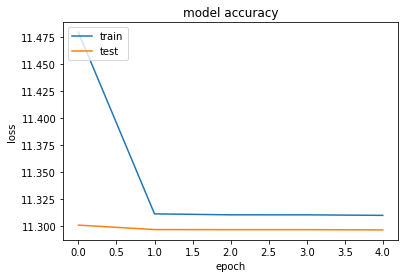

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['recall'])
# plt.plot(history.history['val_recall'])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model_fname = 'models/model-2020-01-04-11-33'
# model_fname = 'models/model-2020-01-09-06-03'
# model_fname = 'models/model-2020-01-12-19-19'
model_fname = 'models/vgg16_model-2020-01-15-05-06'

In [ ]:
# Separate inference phase

import tensorflow.keras.models
# load json and create model
json_file = open(model_fname+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(model_fname+'.hdf5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(optimizer=keras.optimizers.Adam(),
#     loss=customLoss,
    loss = keras.losses.binary_crossentropy,
    metrics=['binary_accuracy',keras.metrics.Recall()])
score = loaded_model.evaluate(valid_X, valid_Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
print(loaded_model.metrics_names)
print(score)

### Metric from rules
```
import numpy as np
import sklearn.metrics

scores = []
for component in ['grapheme_root', 'consonant_diacritic', 'vowel_diacritic']:
    y_true_subset = solution[solution[component] == component]['target'].values
    y_pred_subset = submission[submission[component] == component]['target'].values
    scores.append(sklearn.metrics.recall_score(
        y_true_subset, y_pred_subset, average='macro'))
final_score = np.average(scores, weights=[2,1,1])
```
also keep in mind target is constructed as
```
y_1 = pd.get_dummies(train_df.vowel_diacritic).values
y_2 = pd.get_dummies(train_df.grapheme_root).values
y_3 = pd.get_dummies(train_df.consonant_diacritic).values
assert(y.shape[1]==11+168+7)
del train_df, y_1,y_2,y_3
```

plan: 
1. get prediction on validation set
2. try to compute metric for val set 
3. try to incorporate metric into training

In [ ]:
predictions=loaded_model.predict(valid_X)

In [ ]:
assert(valid_Y.shape==predictions.shape)

In [ ]:
scores = []

for intervals in [(0,11),(11,179),(179,186)]:    
    y_true_subset = valid_Y[:,intervals[0]:intervals[1]]
    y_pred_subset = predictions[:,intervals[0]:intervals[1]]
    #"hard" max
    y_pred_choice = np.zeros(y_pred_subset.shape, dtype='uint8')
    y_pred_choice[np.arange(len(y_pred_subset)), y_pred_subset.argmax(axis=1)] = 1   
    
    partical_score = sklearn.metrics.recall_score(
        y_true_subset, y_pred_choice, average='macro')
    scores.append(partical_score)
    
    print('for '+str(intervals)+ ' score is '+str(partical_score))
    

final_score = np.average(scores, weights=[1,2,1])
print()
print('TOTAL: '+str(final_score))

In [ ]:
# for model-2020-01-12-19-19
# for (0, 11) score is 0.8161456276283384
# for (11, 179) score is 0.41152848969600087
# for (179, 186) score is 0.6923909632987134

# TOTAL: 0.5828983925797634

# AND 

# for (0, 11) score is 0.8016213740678662
# for (11, 179) score is 0.4136798279457808
# for (179, 186) score is 0.7025289942805701

# TOTAL: 0.5828775060599996


Outcome

| Model                       |file name | Local Recall   |LB score |  Ep |Comment|
|-----------------------------|----------|----------------|---------|-----|-----------|
| mnist_main (186 Dense out), custom loss  | model-2020-01-09-05-43 |0.0614  |  | 6  |Seems there is a bug because keras recall doesn't equal recall per model|
| mnist_main (186 Dense out), binary_crossenthropy loss | model-2020-01-09-06-03 |0.5828 | 0.5723 | 6 | Custom loss makes training much worse|
| mnist_main (3x softmax out) |model-2020-01-12-19-19 | 0.5829 | N/A | 11 | Doesn't makes much sence to submit
| vgg16 | vgg16_model-2020-01-15-05-06 | 0.0614 | N/A | 1 | Model is not training after 1 epoch (to add shuffles, augment)
